<a class="anchor" id="0"></a>
# **Decision Tree Classifier and Naive Bayes with Python**

Global Coffee Health Dataset


In [165]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
# Melakukan load dataset using pandas dataframe dan menampilkan 5 rows pertama data
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [180]:
# Mengetahui kolom apa saja pada data serta jumlah null value pada data dan type data nya.
# Dari sini dapat mulai melakukan strategi untuk mengisi null value dengan nilai yang cocok

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [ ]:
# Mengetahui deskripsi dari seluruh data numerik. Dari informasi dibawah diketahui bahwa terdapat minimal age 18 dan max 80 thn, dan lain sebagainya

df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [ ]:
# Karena ID tidak dipakai untuk analisis/prediksi maka dibuang

df = df.drop('ID', axis=1)
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


In [ ]:
# Melihat frequency dari setiap unik value

col_names = ['Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg', 'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level', 
             'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
    print(df[col].value_counts())


Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Belgium        497
Australia      497
Germany        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Coffee_Intake
0.0    558
2.7    305
2.8    270
2.1    269
2.2    266
      ... 
7.8      2
7.7      2
8.2      1
7.2      1
7.1      1
Name: count, Length: 78, dtype: int64
Caffeine_mg
0.0      528
148.1      9
323.3      9
259.3      9
265.3      9
        ... 
490.6      1
95.3       1
196.8      1
379.0      1
59.1       1
Name: count, Length: 4277, dtype: int64
Sleep_Hours
6.7    333
6.9    331
6.6    324
7.1    323
6.5    320
      ... 
9.9      8
3.4      7
3.1      6
3.2      6
9.7      5
Name: c

In [ ]:
# Replace Null to None values in 'Health_Issues'  
# Karena data sebenarnya adalah None

df = df.fillna("None")
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


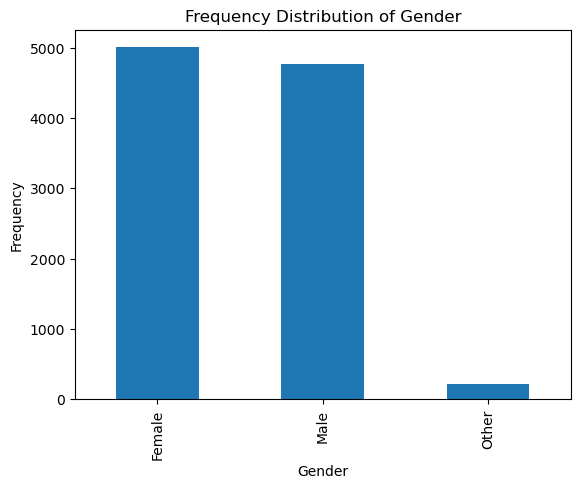

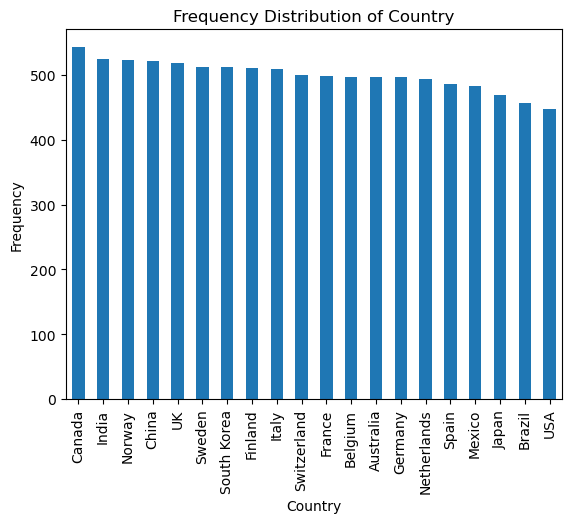

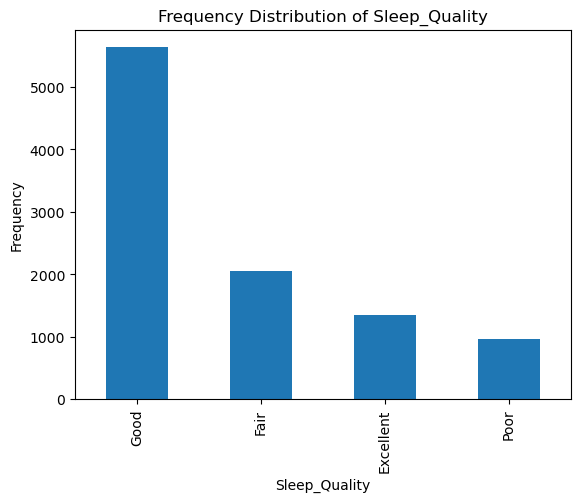

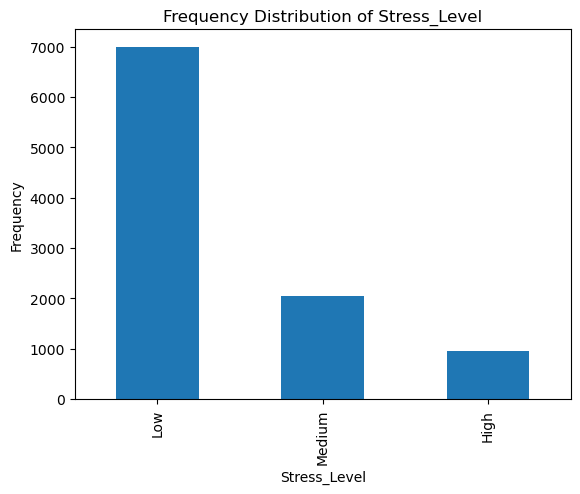

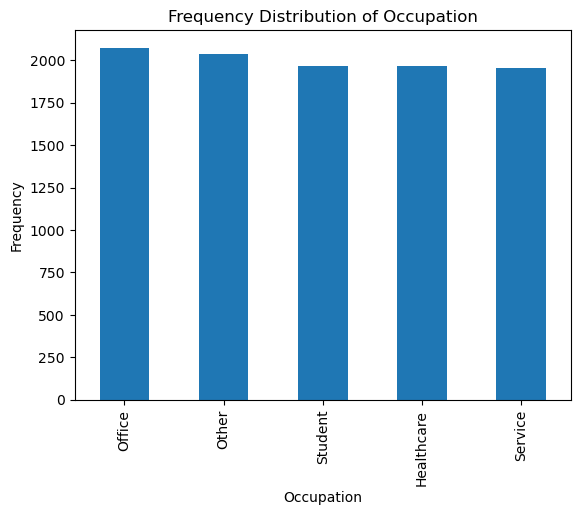

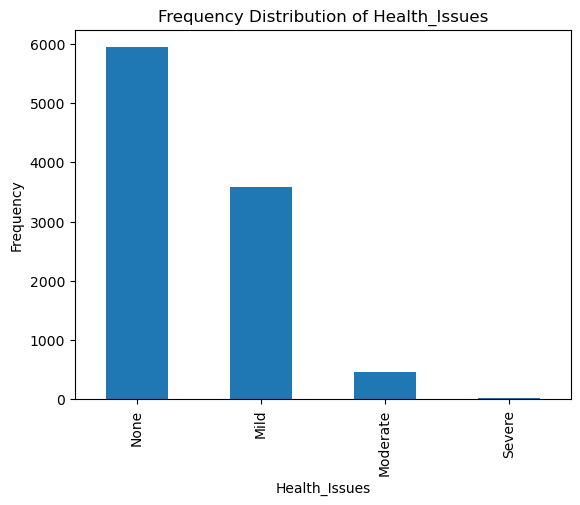

In [ ]:
# Melihat frequency dari data kategorikal seperti gender, country, sleep_quality, dll.
# Untuk info saja

col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation', 'Health_Issues']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

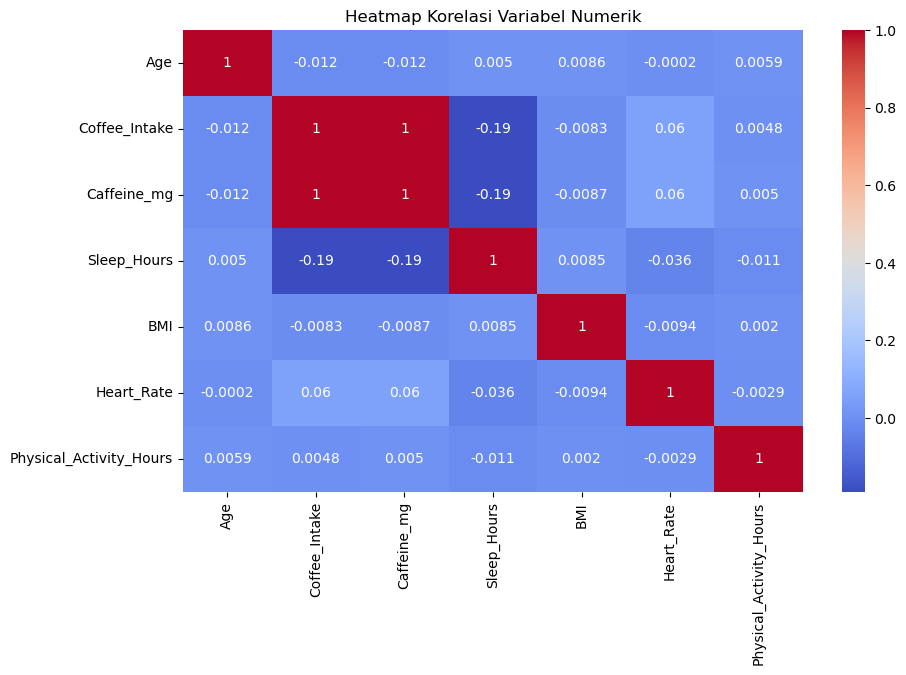

In [ ]:
# EDA
# Korelasi antar variabel yg numerik yang ditunjukan melalui warna merah atau biru.
# Merah menandakan korelasi yang kuat dan positif dan biru sebaliknya
# coffee_intake dan coffeine_mg menghasilkan 1 berarti hubungan nya berbanding lurus, jadi semakin banyak coffee semakin banyak kafein
# caffeine_mg dengan sleep_hours menghasilkan -0.19 berarti semakin banyak dikonsumsi maka semakin dikit sleep_hours

numeric_cols = ['Age','Coffee_Intake','Caffeine_mg','Sleep_Hours','BMI','Heart_Rate','Physical_Activity_Hours']
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

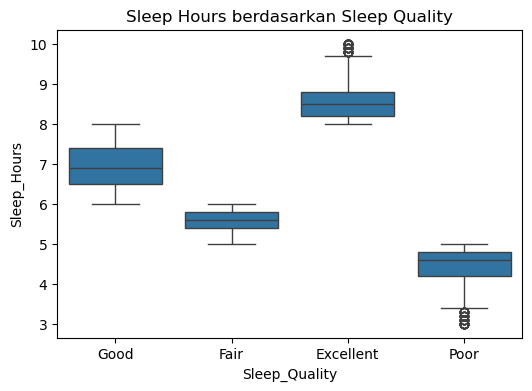

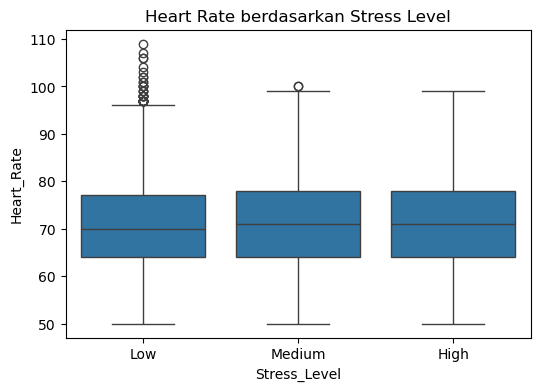

In [ ]:
# EDA
# Good → Mayoritas orang dengan kualitas tidur "Good" tidur sekitar 6–7 jam, dengan variasi kecil.
# Fair → Orang dengan kualitas tidur "Fair" cenderung tidur 5–6 jam, lebih sedikit dibandingkan kategori lain.
# Excellent → Orang dengan kualitas tidur "Excellent" memiliki durasi tidur paling tinggi, sekitar 8–9 jam, dengan sedikit outlier yang tidur lebih lama (9–10 jam).
# Poor → Orang dengan kualitas tidur "Poor" hanya tidur sekitar 4–5 jam, bahkan ada yang lebih rendah (~3 jam).
# Berarti semakin baik kualitas tidur, semakin lama durasi tidur seseorang. Sebaliknya, kualitas tidur buruk akan berkaitan dengan jam tidur sangat pendek.

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Sleep_Quality", y="Sleep_Hours")
plt.title("Sleep Hours berdasarkan Sleep Quality")
plt.show()

# Low Stress → Median heart rate sekitar 70 bpm, tapi banyak outlier sekitar 90–110 bpm.
# Medium Stress → Median heart rate juga sekitar 70–72 bpm, dengan rentang lebih lebar dan tidak memiliki banyak outlier seperti Low Stress.
# High Stress → High heart rate mirip (72 bpm), namun sebarannya cenderung lebih tinggi daripada yang medium.

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Stress_Level", y="Heart_Rate")
plt.title("Heart Rate berdasarkan Stress Level")
plt.show()

In [135]:
df['Health_Issues'].value_counts()

Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64

In [136]:
# check missing values in variables

df.isnull().sum()

Age                        0
Gender                     0
Country                    0
Coffee_Intake              0
Caffeine_mg                0
Sleep_Hours                0
Sleep_Quality              0
BMI                        0
Heart_Rate                 0
Stress_Level               0
Physical_Activity_Hours    0
Health_Issues              0
Occupation                 0
Smoking                    0
Alcohol_Consumption        0
dtype: int64

In [137]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Occupation', 'Health_Issues']:
  print(df[column].unique())

  # kurang physical activity

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['Other' 'Service' 'Office' 'Student' 'Healthcare']
['None' 'Mild' 'Moderate' 'Severe']


In [ ]:
# Melakukan encoding untuk kategorikal value
gender_map = {'Male': 1, 'Female': 2, 'Other': 3}
country_map = {'Germany': 1, 'Brazil': 2, 'Spain': 3, 'Mexico': 4, 'France': 4, 'Canada': 4, 'UK': 4, 'Switzerland': 4, 'Netherlands': 4, 'Italy': 4, 
             'China': 4, 'Japan': 4, 'Belgium': 4, 'Finland': 4, 'Australia': 4, 'USA': 4, 'Sweden': 4, 'India': 4, 'Norway': 4, 'South Korea': 4}
sleep_quality_map = {'Poor': 1, 'Excellent': 2, 'Fair': 3, 'Good': 4}
stress_level_map = {'Low': 1, 'Medium': 2, 'High': 3}
occupation_map = {'Other': 1, 'Service': 2, 'Office': 3, 'Student': 4, 'Healthcare': 5}
health_issues_map = {'None': 1, 'Mild': 2, 'Moderate': 3, 'Severe': 4}

df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Occupation'] = df['Occupation'].map(occupation_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
2488,35,1,4,4.0,375.5,5.4,3,16.8,58,2,1.6,2,2,0,1
3592,62,1,4,3.4,323.3,6.7,4,26.9,72,1,1.9,2,4,1,1
568,18,1,4,0.0,0.0,6.6,4,24.0,50,1,9.6,1,4,1,1
415,26,2,4,3.4,323.7,6.9,4,26.8,71,1,1.7,1,4,0,0
7330,70,1,1,4.2,401.6,8.4,2,24.1,65,1,9.5,2,1,0,0


In [139]:
# bins = [0, 5, 10, 15]  # batas umur bangunan
# labels = ['Low', 'Medium', 'High']  # label

# df['Physical_Activity'] = pd.cut(df['Physical_Activity_Hours'], bins=bins, labels=labels, right=True, include_lowest=True)

# # cek hasil
# print(df[['Physical_Activity_Hours', 'Physical_Activity']].head(10))

In [140]:
# binary_cols = ["Smoking", "Alcohol_Consumption"]

# df[binary_cols] = df[binary_cols].replace({0: "No", 1: "Yes"})

# print(df[binary_cols].head())
# df.head()

In [ ]:
# Define x dan y variabel
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [142]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,4,24.9,78,1,14.5,1,0,0
1,33,1,1,1.0,94.1,6.2,4,20.0,67,1,11.0,2,0,0
2,42,1,2,5.3,503.7,5.9,3,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,4,24.7,71,1,6.6,1,0,0
4,32,2,3,3.1,298.0,5.3,3,24.1,76,2,8.5,4,0,1


In [143]:
y.head()

0    1
1    1
2    2
3    2
4    2
Name: Health_Issues, dtype: int64

In [144]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [145]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [146]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,3,18.0,86,2,2.4,2,0,1
1561,26,1,4,0.0,0.0,5.5,3,28.3,75,2,10.8,1,0,0
1670,32,1,4,2.8,268.1,7.3,4,27.4,69,1,8.6,3,0,0
6087,18,1,4,2.2,208.6,8.1,2,16.3,83,1,8.9,1,0,1
6669,43,2,4,2.6,251.1,9.4,2,25.4,68,1,3.4,3,0,0


In [147]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,4,2.6,245.9,6.7,4,30.1,76,1,1.9,2,0,1
4684,22,2,4,3.1,293.1,7.6,4,20.4,69,1,5.0,2,0,0
1731,30,1,4,3.9,372.4,6.4,4,27.5,75,1,13.8,3,0,0
4742,35,1,1,1.0,92.5,5.3,3,23.1,71,2,2.4,2,0,0
4521,47,1,4,1.3,119.0,6.9,4,28.4,64,1,9.6,3,1,0


# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [148]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [149]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

clf_gini.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=0)

In [150]:
y_pred_gini = clf_gini.predict(X_test)

# ini setelah di training setelah bljr, maka disini baru di test kan/ di predict kan

In [151]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9965


[Text(0.5, 0.9, 'x[9] <= 1.5\ngini = 0.519\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.7, 'x[0] <= 50.5\ngini = 0.256\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.125, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.0625, 0.3, 'gini = 0.0\nsamples = 4714\nvalue = [4714, 0, 0, 0]'),
 Text(0.1875, 0.3, 'x[7] <= 30.05\ngini = 0.054\nsamples = 326\nvalue = [9, 317, 0, 0]'),
 Text(0.125, 0.1, 'gini = 0.495\nsamples = 20\nvalue = [9, 11, 0, 0]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 306\nvalue = [0, 306, 0, 0]'),
 Text(0.375, 0.5, 'x[7] <= 30.0\ngini = 0.113\nsamples = 514\nvalue = [0, 483, 31, 0]'),
 Text(0.3125, 0.3, 'gini = 0.0\nsamples = 483\nvalue = [0, 483, 0, 0]'),
 Text(0.4375, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31, 0]'),
 Text(0.75, 0.7, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.625, 0.5, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 2085, 140, 0]

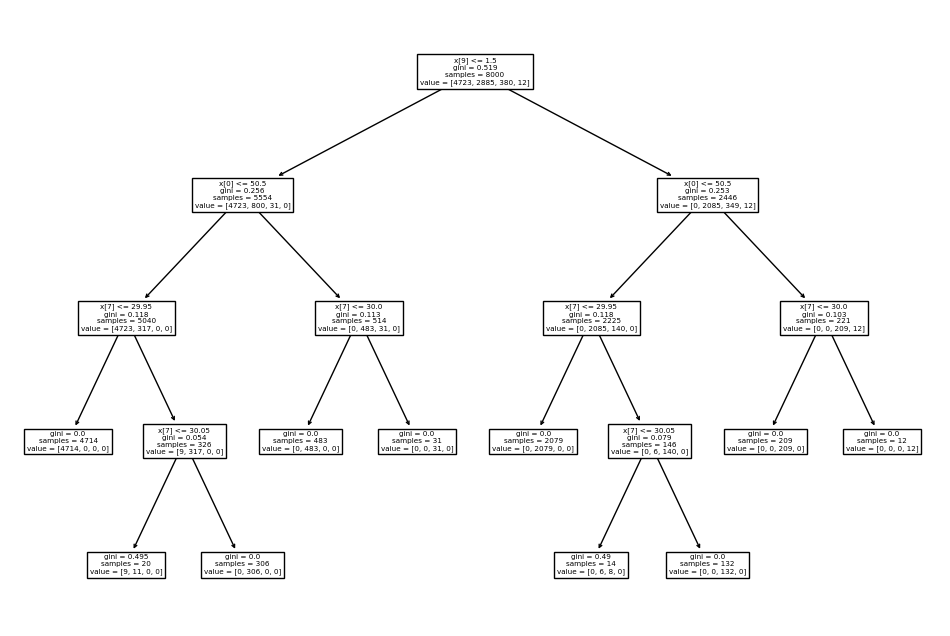

In [152]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [153]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [154]:
y_pred_en = clf_en.predict(X_test)

In [155]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.9965


[Text(0.5, 0.875, 'x[9] <= 1.5\nentropy = 1.202\nsamples = 8000\nvalue = [4723, 2885, 380, 12]'),
 Text(0.25, 0.625, 'x[0] <= 50.5\nentropy = 0.643\nsamples = 5554\nvalue = [4723, 800, 31, 0]'),
 Text(0.125, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 5040\nvalue = [4723, 317, 0, 0]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 4714\nvalue = [4714, 0, 0, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.182\nsamples = 326\nvalue = [9, 317, 0, 0]'),
 Text(0.375, 0.375, 'x[7] <= 30.0\nentropy = 0.329\nsamples = 514\nvalue = [0, 483, 31, 0]'),
 Text(0.3125, 0.125, 'entropy = 0.0\nsamples = 483\nvalue = [0, 483, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.0\nsamples = 31\nvalue = [0, 0, 31, 0]'),
 Text(0.75, 0.625, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [0, 2085, 349, 12]'),
 Text(0.625, 0.375, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 2085, 140, 0]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 2079, 0, 0]'),
 Text(0.6875, 0.125, 'en

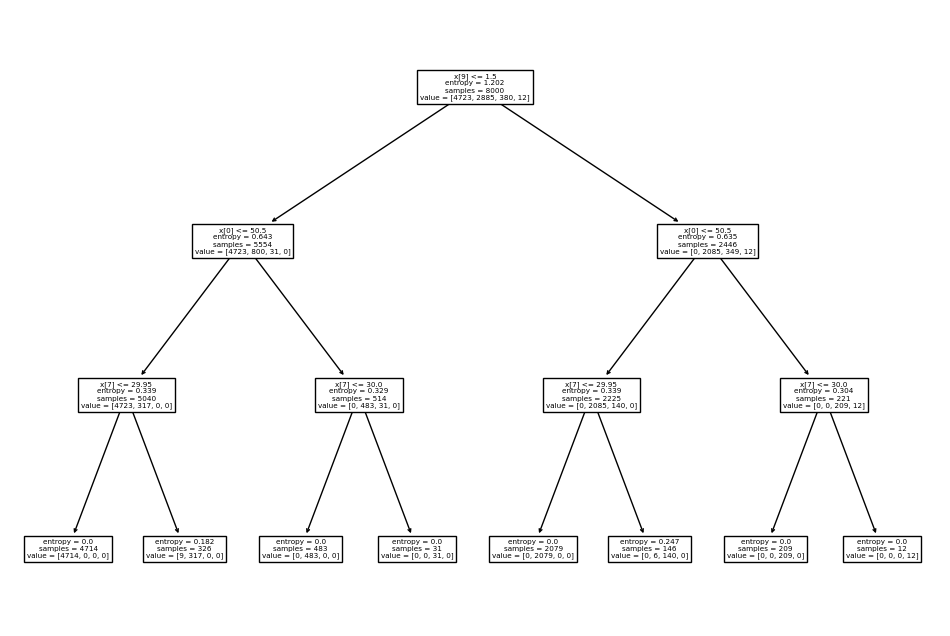

In [156]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [157]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [158]:
y_pred_nb = nb_classifier.predict(X_test)

In [159]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with naive bayes: {0:0.4f}'. format(accuracy_score(y_test, y_pred_nb)))

Model accuracy score with naive bayes: 0.8550


# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [160]:
# DECISION TREE ENTROPY
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1218
           2       0.99      1.00      0.99       694
           3       0.99      0.99      0.99        83
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [161]:
# DECISION TREE GINI
print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1218
           2       0.99      1.00      0.99       694
           3       0.99      0.99      0.99        83
           4       1.00      1.00      1.00         5

    accuracy                           1.00      2000
   macro avg       0.99      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [162]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.85      1.00      0.92      1218
           2       0.88      0.70      0.78       694
           3       0.62      0.10      0.17        83
           4       0.00      0.00      0.00         5

    accuracy                           0.85      2000
   macro avg       0.59      0.45      0.47      2000
weighted avg       0.85      0.85      0.84      2000



In [ ]:
# binary_cols = ["Smoking", "Alcohol_Consumption"]

# df[binary_cols] = df[binary_cols].replace({0: "No", 1: "Yes"})

# print(df[binary_cols].head())
# df.head()

  Smoking Alcohol_Consumption
0      No                  No
1      No                  No
2      No                  No
3      No                  No
4      No                 Yes


,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,4,24.9,78,1,14.5,1,1,No,No
1,33,1,1,1.0,94.1,6.2,4,20.0,67,1,11.0,1,2,No,No
2,42,1,2,5.3,503.7,5.9,3,22.7,59,2,11.2,2,3,No,No
3,53,1,1,2.6,249.2,7.3,4,24.7,71,1,6.6,2,1,No,No
4,32,2,3,3.1,298.0,5.3,3,24.1,76,2,8.5,2,4,No,Yes


In [163]:
smoking_map = {'No': 0, 'Yes': 1}
alcohol_map = {'No': 0, 'Yes': 1}

In [ ]:
# Make a prediction with the gini index model

# input value:
new_data = {
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,
    'Occupation': occupation_map['Student'],
    'Smoking': smoking_map['Yes'],
    'Alcohol_Consumption': alcohol_map['Yes']
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([new_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])


# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 2
The predicted class for the given input using the gini index model is: Mild
